In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipldata/matches.csv
/kaggle/input/ipldata/deliveries.csv


# Deliveries Dataframe

In [2]:
deliveries=pd.read_csv('/kaggle/input/ipldata/deliveries.csv')
matches=pd.read_csv('/kaggle/input/ipldata/matches.csv',parse_dates=['date'])


In [3]:
deliveries.shape,matches.shape

((179078, 21), (756, 18))

In [4]:
deliveries.columns,matches.columns

(Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
        'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
        'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
        'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
        'dismissal_kind', 'fielder'],
       dtype='object'),
 Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
        'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
        'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
        'umpire3'],
       dtype='object'))

In [29]:
matches.replace('Delhi Daredevils','Delhi Capitals',inplace=True)
deliveries.replace('Delhi Daredevils','Delhi Capitals',inplace=True)

# Matches Dataframe


In [30]:
matches.index=matches.date
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
date,,,,,,,,,,,,,,,,,,
2017-04-05,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2017-04-06,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2017-04-07,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
2017-04-08,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
2017-04-08,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


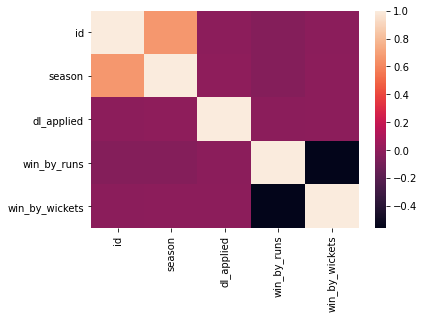

In [31]:
sns.heatmap(matches.corr())

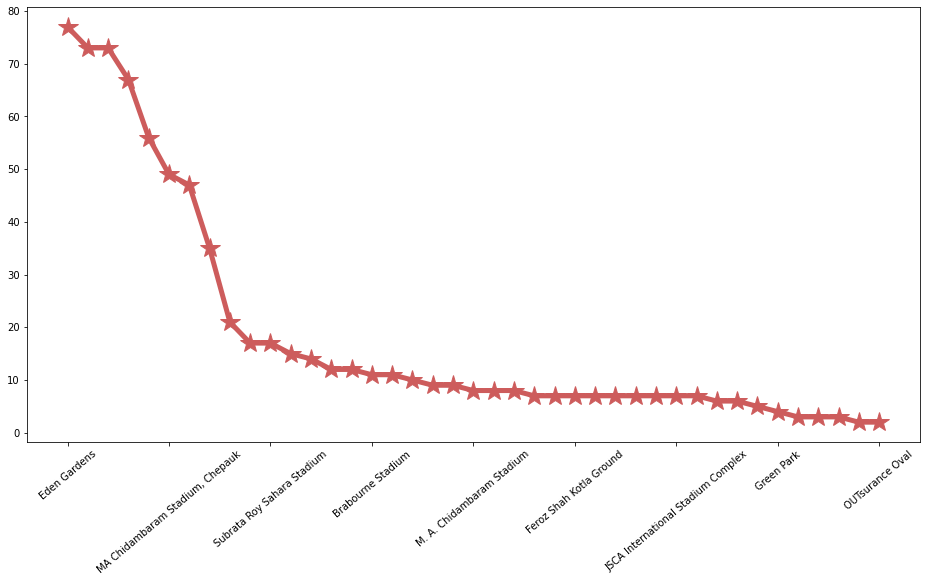

In [32]:
matches.venue.value_counts().plot(rot=40,color='indianred',marker='*',figsize=(16,8),linewidth=5,markersize=20)

In [33]:

matches.pivot_table(index=['toss_winner']).sort_values('win_by_runs',ascending=False)

,dl_applied,id,season,win_by_runs,win_by_wickets
toss_winner,,,,,
Pune Warriors,0.000000,354.150000,2012.200000,19.100000,2.700000
Chennai Super Kings,0.022472,2755.640449,2013.550562,16.280899,2.853933
Rising Pune Supergiant,0.000000,28.000000,2017.000000,16.166667,5.166667
Royal Challengers Bangalore,0.012346,1515.432099,2013.604938,15.259259,3.333333
Delhi Capitals,0.033333,2193.377778,2013.577778,14.855556,3.111111
Mumbai Indians,0.000000,1598.040816,2013.510204,14.438776,3.275510
Gujarat Lions,0.000000,336.800000,2016.466667,14.266667,3.466667
Kings XI Punjab,0.024691,1791.753086,2013.234568,13.333333,3.629630
Rajasthan Royals,0.012500,2392.725000,2013.037500,11.425000,3.275000


In [34]:
matches.toss_winner.value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Delhi Capitals                 90
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

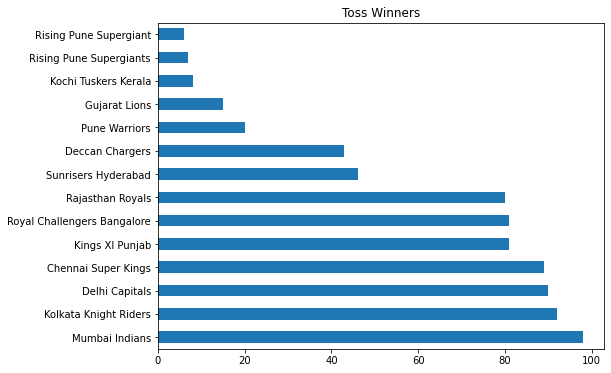

In [35]:
matches.toss_winner.value_counts().plot.barh(figsize=(8,6),title='Toss Winners')

In [36]:
matches.pivot_table(index=['winner']).sort_values('win_by_runs',ascending=False)

,dl_applied,id,season,win_by_runs,win_by_wickets
winner,,,,,
Chennai Super Kings,0.020000,2256.750000,2013.090000,17.780000,2.890000
Mumbai Indians,0.000000,1842.816514,2013.678899,17.119266,2.816514
Royal Challengers Bangalore,0.035714,1538.845238,2013.142857,14.904762,3.738095
Deccan Chargers,0.000000,214.413793,2010.034483,14.517241,2.482759
Rising Pune Supergiant,0.000000,33.600000,2017.000000,12.300000,3.100000
Sunrisers Hyderabad,0.034483,2836.758621,2015.948276,12.293103,2.982759
Rajasthan Royals,0.013333,1744.586667,2012.466667,11.933333,3.640000
Kolkata Knight Riders,0.043478,1785.434783,2013.815217,11.804348,3.815217
Pune Warriors,0.000000,335.416667,2012.000000,11.583333,3.000000


In [37]:
matches.winner.value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Delhi Capitals                  77
Rajasthan Royals                75
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

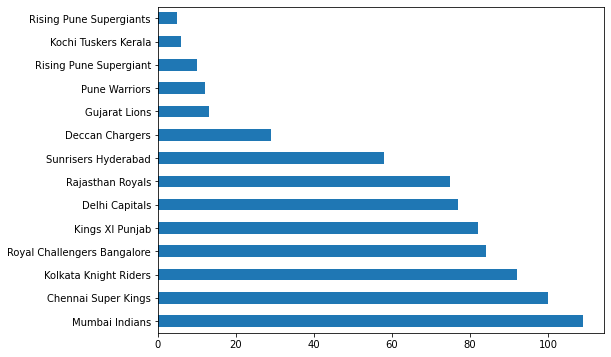

In [38]:
matches.winner.value_counts().plot.barh(figsize=(8,6))

## Who will win the match? Most likely Mumbai Indians

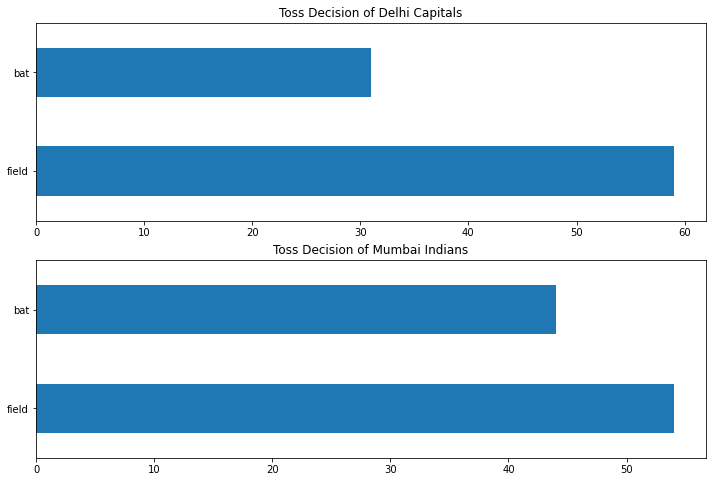

In [39]:
fig,ax=plt.subplots(nrows=2,figsize=(12,8))
matches[matches.toss_winner=='Delhi Capitals'].toss_decision.value_counts().plot.barh(title='Toss Decision of Delhi Capitals',
                                                                                      ax=ax[0])
matches[matches.toss_winner=='Mumbai Indians'].toss_decision.value_counts().plot.barh(title='Toss Decision of Mumbai Indians',
                                                                                      ax=ax[1])

## What will the toss winning captain decide to do first? Most likely Fielding

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7e2fab0fd0>,
      dtype=object)

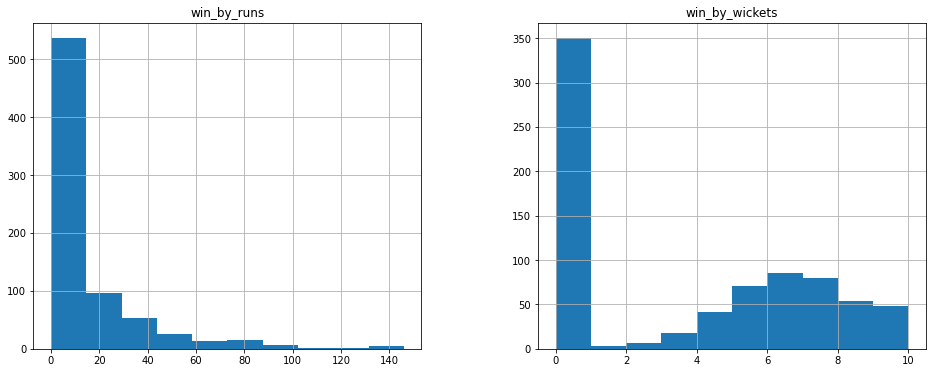

In [40]:
matches.drop(['id','dl_applied','season'],axis=1).hist(figsize=(16,6))

In [41]:
'''def cat_plot():
    fig,ax=plt.subplots(nrows=4,figsize=(6,18))
    sns.countplot(matches.winner,ax=ax[0])
    sns.countplot(matches.win_by_runs,ax=ax[1])
    sns.countplot(matches.venue,ax=ax[2])
    sns.countplot(matches.toss_decision,ax=ax[3])
    for subplots in ax:
        for labels in subplots.get_xticklabels():
            labels.set_rotation(90)
cat_plot()'''

'def cat_plot():\n    fig,ax=plt.subplots(nrows=4,figsize=(6,18))\n    sns.countplot(matches.winner,ax=ax[0])\n    sns.countplot(matches.win_by_runs,ax=ax[1])\n    sns.countplot(matches.venue,ax=ax[2])\n    sns.countplot(matches.toss_decision,ax=ax[3])\n    for subplots in ax:\n        for labels in subplots.get_xticklabels():\n            labels.set_rotation(90)\ncat_plot()'

In [42]:
'''def cat_plot(df,columns,size):
    length=len(columns)
    fig,ax=plt.subplots(nrows=length,figsize=size)
    for i in range(length):
        for j in ax:
            df[columns[i]].value_counts().plot.bar(ax=ax[i],rot=90)
            ax[i].set_title(columns[i])'''
    

'def cat_plot(df,columns,size):\n    length=len(columns)\n    fig,ax=plt.subplots(nrows=length,figsize=size)\n    for i in range(length):\n        for j in ax:\n            df[columns[i]].value_counts().plot.bar(ax=ax[i],rot=90)\n            ax[i].set_title(columns[i])'

In [43]:
#cat_plot(matches,['winner','toss_decision','result','venue'],(18,37))

In [44]:
'''
fig,ax=plt.subplots(ncols=4,figsize=(15,12))
for _ in ax:
    matches.winner.value_counts().plot.barh(ax=ax[_])
    matches.toss_decision.value_counts().plot.barh(ax=ax[_])
    matches.result.value_counts().plot.barh(ax=ax[_])
    matches.venue.value_counts().plot.barh(ax=ax[_])'''

'\nfig,ax=plt.subplots(ncols=4,figsize=(15,12))\nfor _ in ax:\n    matches.winner.value_counts().plot.barh(ax=ax[_])\n    matches.toss_decision.value_counts().plot.barh(ax=ax[_])\n    matches.result.value_counts().plot.barh(ax=ax[_])\n    matches.venue.value_counts().plot.barh(ax=ax[_])'

In [45]:

matches.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [46]:
matches[matches.player_of_match=='R Sharma']

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
date,,,,,,,,,,,,,,,,,,
2011-05-04,277,2011,Mumbai,2011-05-04,Mumbai Indians,Pune Warriors,Pune Warriors,field,normal,0,Mumbai Indians,21,0,R Sharma,Dr DY Patil Sports Academy,HDPK Dharmasena,SJA Taufel,NaN
2011-05-08,284,2011,Chandigarh,2011-05-08,Kings XI Punjab,Pune Warriors,Kings XI Punjab,bat,normal,0,Pune Warriors,0,5,R Sharma,"Punjab Cricket Association Stadium, Mohali",SK Tarapore,RJ Tucker,NaN


# Deliveries Dataframe

In [47]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [48]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [65]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

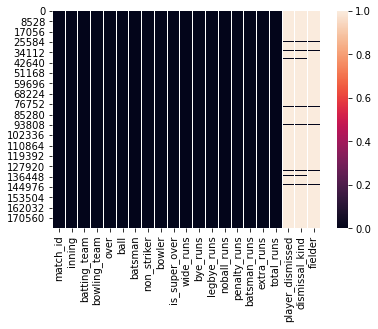

In [49]:
sns.heatmap(deliveries.isnull())

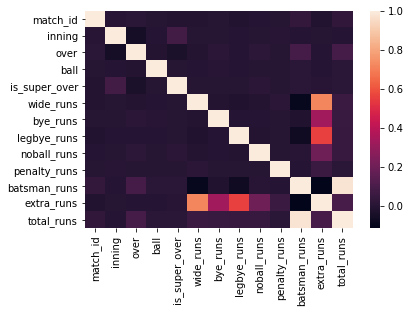

In [50]:
sns.heatmap(deliveries.corr())

In [129]:
deliveries[(deliveries.batsman=='R Sharma') | (deliveries.batsman=='RG Sharma')].pivot_table(index='match_id',aggfunc=np.sum).mean()

ball              70.958763
batsman_runs      25.670103
bye_runs           0.010309
extra_runs         0.762887
inning            29.092784
is_super_over      0.000000
legbye_runs        0.273196
noball_runs        0.067010
over             218.257732
penalty_runs       0.000000
total_runs        26.432990
wide_runs          0.412371
dtype: float64

In [130]:
deliveries[(deliveries.batting_team=='Delhi Capitals') & (deliveries.bowling_team=='Mumbai Indians')].pivot_table(index='match_id',aggfunc=np.sum).mean()

ball              420.666667
batsman_runs      142.083333
bye_runs            0.375000
extra_runs          7.041667
inning            197.708333
is_super_over       0.000000
legbye_runs         2.041667
noball_runs         0.541667
over             1172.541667
penalty_runs        0.208333
total_runs        149.125000
wide_runs           3.875000
dtype: float64

In [72]:
deliveries[(deliveries.bowling_team=='Delhi Capitals') & (deliveries.bowling_team=='Mumbai Indians')]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder


In [117]:
deliveries[deliveries.bowler=='K Rabada'].pivot_table(index='match_id',aggfunc=np.sum).mean()

,ball,batsman_runs,bye_runs,extra_runs,inning,is_super_over,legbye_runs,noball_runs,over,penalty_runs,total_runs,wide_runs
match_id,,,,,,,,,,,,
24,3.888889,0.851852,0.000000,0.296296,1.000000,0,0.037037,0.037037,8.666667,0,1.148148,0.222222
31,3.285714,0.904762,0.190476,0.428571,2.000000,0,0.190476,0.000000,9.000000,0,1.333333,0.047619
35,3.769231,1.307692,0.000000,0.076923,2.000000,0,0.000000,0.000000,2.923077,0,1.384615,0.076923
39,3.640000,2.320000,0.000000,0.040000,1.000000,0,0.000000,0.040000,11.600000,0,2.360000,0.000000
41,3.500000,1.166667,0.000000,0.000000,1.000000,0,0.000000,0.000000,10.750000,0,1.166667,0.000000
44,3.888889,1.074074,0.000000,0.185185,1.000000,0,0.037037,0.000000,10.481481,0,1.259259,0.148148
11139,3.925926,0.888889,0.000000,0.185185,2.000000,0,0.037037,0.000000,12.703704,0,1.074074,0.148148
11141,3.318182,1.181818,0.000000,0.000000,2.000000,0,0.000000,0.000000,10.727273,0,1.181818,0.000000
11146,3.633333,1.600000,0.000000,0.033333,1.666667,0,0.000000,0.000000,9.200000,0,1.633333,0.033333
